In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
import random
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7),(1,8),(8,9),(9,3),(7,10),(10,3),(6,0),(4,7)]

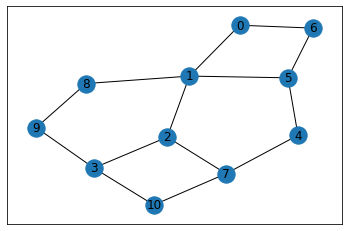

In [ ]:
goal = 3

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
for p in nx.all_simple_paths(G,6,3):
  print(p)

[6, 5, 1, 2, 3]
[6, 5, 1, 2, 7, 10, 3]
[6, 5, 1, 8, 9, 3]
[6, 5, 4, 7, 2, 1, 8, 9, 3]
[6, 5, 4, 7, 2, 3]
[6, 5, 4, 7, 10, 3]
[6, 0, 1, 5, 4, 7, 2, 3]
[6, 0, 1, 5, 4, 7, 10, 3]
[6, 0, 1, 2, 3]
[6, 0, 1, 2, 7, 10, 3]
[6, 0, 1, 8, 9, 3]


In [ ]:
MATRIX_SIZE = 11
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [ ]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    # print(point)
    # print(point[1])          
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
1,0.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2,-1.0,0.0,-1.0,100.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,0.0,100.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0
5,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
6,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
8,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
9,-1.0,-1.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# learning parameter for Q i.e is with Epsilon-greedy-Policy
gamma = 0.6
er = 0.9

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]  #returns all the index position where value is 0 or more. [0,2,5] 
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    random_value = random.uniform(0,1)

    if random_value < er:
      next_action = int(np.random.choice(available_act,1)) 
    else:
      min = 99999
      for i in available_actions_range:
        if (R[i,] < min).any():
          max = R[i,]
          next_action = i
    # next_action = int(np.random.choice(available_act,1)) 
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
# Training for Q
scoresQ = []
for i in range(600):
    current_state = np.random.randint(0, 11)
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scoresQ.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 60.0
Score: 260.0
max_value 60.0
Score: 320.0
max_value 36.0
Score: 356.0
max_value 0.0
Score: 356.0
max_value 0.0
Score: 356.0
max_value 0.0
Score: 356.0
max_value 0.0
Score: 356.0
max_value 36.0
Score: 392.0
max_value 21.599999999999998
Score: 413.6
max_value 12.959999999999999
Score: 426.55999999999995
max_value 21.599999999999998
Score: 448.15999999999997
max_value 21.599

Most efficient path:
[6, 5, 1, 2, 3]


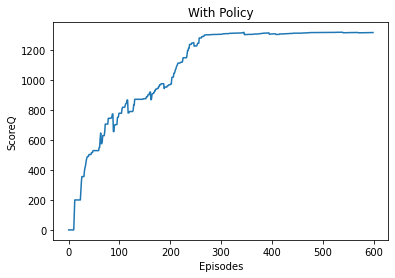

In [ ]:
# Testing for Q
current_state = 6
steps = [current_state]

while current_state != 3:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scoresQ)
plt.ylabel('ScoreQ')
plt.xlabel('Episodes')
plt.title('With Policy')
plt.show()

In [ ]:
MATRIX_SIZE = 11
V = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
V *= -1

In [ ]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    # print(point)
    # print(point[1])          
    if point[1] == goal:
        V[point] = 100
    else:
        V[point] = 0

    if point[0] == goal:
        V[point[::-1]] = 100
    else:
        # reverse of point
        V[point[::-1]]= 0

# add goal point round trip
V[goal,goal]= 100

V[6,5] = 50
V[5,1] = 51
V[1,2] = 53
V[2,3] = 55
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
1,0.0,-1.0,53.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2,-1.0,0.0,-1.0,55.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,0.0,100.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0
5,-1.0,51.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
6,0.0,-1.0,-1.0,-1.0,-1.0,50.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
8,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
9,-1.0,-1.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [ ]:
X = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# learning parameter for X
gamma = 0.6
er = 0.9

initial_state = 1

def available_actions(state):
    current_state_row = V[state,]
    av_act = np.where(current_state_row >= 0)[1]  #returns all the index position where value is 0 or more. [0,2,5] 
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    random_value = random.uniform(0,1)

    if random_value < er:
      next_action = int(np.random.choice(available_act,1)) 
    else:
      max = -1
      for i in available_actions_range:
        if (R[i,] > max).any():
          max = R[i,]
          next_action = i
    # next_action = int(np.random.choice(available_act,1)) 
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

  max_index = np.where(X[action,] == np.max(X[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = X[action, max_index]

  X[current_state, action] = V[current_state, action] + gamma * max_value
  print('max_value', V[current_state, action] + gamma * max_value)

  if (np.max(X) > 0):
    return(np.sum(X/np.max(X)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
# Training for X

scoresX = []
for i in range(600):
    current_state = np.random.randint(0, int(X.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scoresX.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(X/np.max(X)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 50.0
Score: 150.0
max_value 53.0
Score: 203.0
max_value 0.0
Score: 203.0
max_value 0.0
Score: 203.0
max_value 30.0
Score: 233.0
max_value 30.0
Score: 263.0
max_value 115.0
Score: 328.695652173913
max_value 115.0
Score: 328.695652173913
max_value 122.0
Score: 366.3934426229509
max_value 0.0
Score: 366.3934426229509
max_value 73.2
Score: 426.3934426229509
max_value 0.0
Score: 426.3934426229509
max_value 73.2
Score: 486.3934426229509
max_value 0.0
Score: 486.3934426229509
max_value 0.0
Score: 486.3934426229509
max_value 160.0
Score: 408.375
max_value 151.0
Score: 430.875
max_value 43.92
Score: 458.325
max_value 73.2
Score: 504.075
max_value 143.6
Score: 517.575
max_value 0.0
Score: 517.575


Most efficient path:
[6, 5, 1, 2, 3]


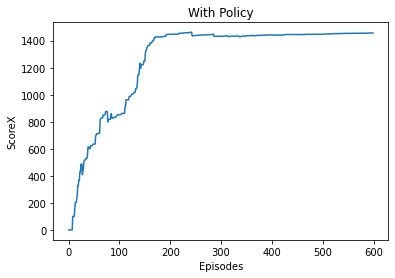

In [ ]:
# Testing for X

current_state = 6
steps = [current_state]

while current_state != 3:

    next_step_index = np.where(X[current_state,] == np.max(X[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scoresX)
plt.ylabel('ScoreX')
plt.xlabel('Episodes')
plt.title('With Policy')
plt.show()

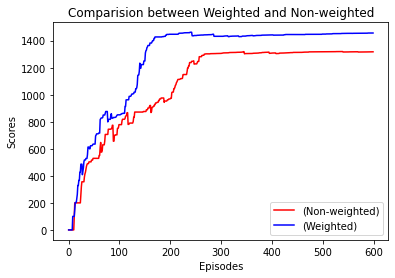

In [ ]:
plt.plot(scoresQ, color='Red')
plt.plot(scoresX, color='Blue')
plt.legend(['(Non-weighted)','(Weighted)'], loc = 'lower right')
plt.ylabel('Scores')
plt.xlabel('Episodes')
plt.title('Comparision between Weighted and Non-weighted')
plt.show()